In [1]:
  !curl https://course-v3.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   665  100   665    0     0   3575      0 --:--:-- --:--:-- --:--:--  3556
Requirement already up-to-date: fastai in /usr/local/lib/python3.6/dist-packages (1.0.39)
Already up to date.


# Classify Your Flower

This challenge is part of the Udacity Pytorch scholarship. It was required to classify 102 types of flowers using Pytorch functions. In this notebook I am using Fastai library which is built on top of Pytorch and released the 1.0 version in October 2018.

In [0]:
%matplotlib inline

I am using Google Colab so I need to mount the drive to read the data from it.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
data_dir = '/content/gdrive/My Drive/Colab Notebooks/data/flower_data'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


We import all the necessary packages. We are going to work with the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163). The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.

In [0]:
from fastai.vision import *

Change the batch size (bs) according to your GPU capacity. If the first option didn't work try smaller sizes.

In [0]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

## Looking at the data

I am going to use [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) which has 102 flower types. Fastai model will need to learn to differentiate between these 102 distinct categories. 


In [0]:
tfms = get_transforms() # using default fastai transforms

# data = ImageDataBunch.from_folder(data_dir, ds_tfms=get_transforms(), size=224, bs=bs) # OR

data = (ImageItemList.from_folder(data_dir) #Where to find the data? -> in path and its subfolders
        .split_by_folder()              #How to split in train/valid? -> use the folders
        .label_from_folder()            #How to label? -> depending on the folder of the filenames
        .transform(tfms, size=224)       #Data augmentation? -> use tfms with a size of 64
        .databunch())                   #Finally? -> use the defaults for conversion to ImageDataBunch

Here I map the category numbers into names as provided in the 'cat_to_name.json' file

In [0]:
import json

with open(data_dir+'/cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)

In [7]:
data.train_ds.y.classes = list(map(lambda idx: cat_to_name[idx], data.train_ds.y.classes))
data.train_ds.y.classes

['pink primrose',
 'globe thistle',
 'blanket flower',
 'trumpet creeper',
 'blackberry lily',
 'snapdragon',
 "colt's foot",
 'king protea',
 'spear thistle',
 'yellow iris',
 'globe-flower',
 'purple coneflower',
 'peruvian lily',
 'balloon flower',
 'hard-leaved pocket orchid',
 'giant white arum lily',
 'fire lily',
 'pincushion flower',
 'fritillary',
 'red ginger',
 'grape hyacinth',
 'corn poppy',
 'prince of wales feathers',
 'stemless gentian',
 'artichoke',
 'canterbury bells',
 'sweet william',
 'carnation',
 'garden phlox',
 'love in the mist',
 'mexican aster',
 'alpine sea holly',
 'ruby-lipped cattleya',
 'cape flower',
 'great masterwort',
 'siam tulip',
 'sweet pea',
 'lenten rose',
 'barbeton daisy',
 'daffodil',
 'sword lily',
 'poinsettia',
 'bolero deep blue',
 'wallflower',
 'marigold',
 'buttercup',
 'oxeye daisy',
 'english marigold',
 'common dandelion',
 'petunia',
 'wild pansy',
 'primula',
 'sunflower',
 'pelargonium',
 'bishop of llandaff',
 'gaura',
 'gera

The first thing we do when we approach a problem is to take a look at the data. We _always_ need to understand very well what the problem is and what the data looks like before we can figure out how to solve it. Taking a look at the data means understanding how the data directories are structured, what the labels are and what some sample images look like.

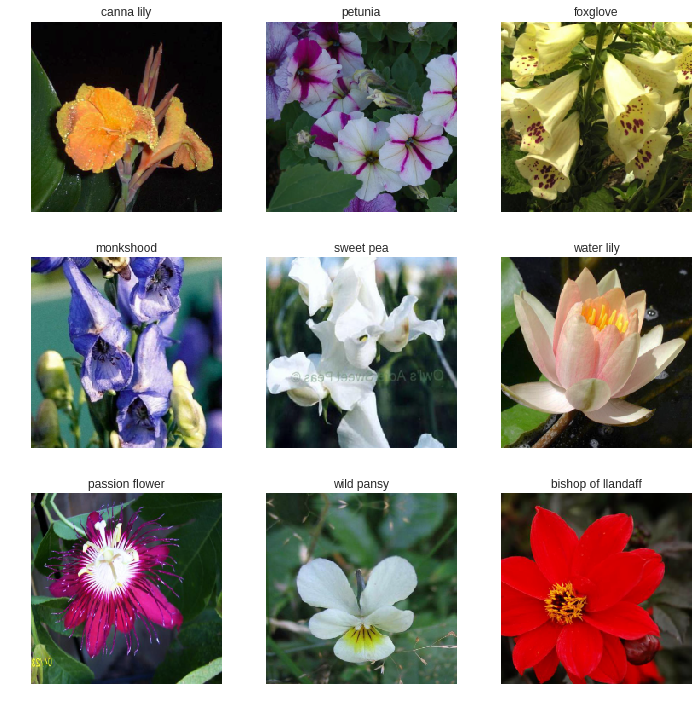

In [8]:
data.show_batch(rows=3, figsize=(10,10))

## Training: resnet34

Now we will start training our model. We will use a [convolutional neural network](http://cs231n.github.io/convolutional-networks/) backbone and a fully connected head with a single hidden layer as a classifier and output the predicted probability for each of the categories.

We will train for 4 epochs (4 cycles through all our data).

In [0]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)

In [11]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy
1,1.461794,0.583092,0.876528
2,0.651802,0.286127,0.935208
3,0.343132,0.210764,0.943765
4,0.220531,0.193923,0.951100


Load or save model (depends on the experiment type and the internet connection :D)

In [0]:
# learn.load('/content/gdrive/My Drive/Colab Notebooks/models/flower_fastai_stage-1');
learn.save('/content/gdrive/My Drive/Colab Notebooks/models/flower_fastai_stage-1')

## Results

Let's see what results we have got. 

We will first see which were the categories that the model most confused with one another. We will try to see if what the model predicted was reasonable or not. In this case the mistakes look reasonable (none of the mistakes seems obviously naive). This is an indicator that our classifier is working correctly. 

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

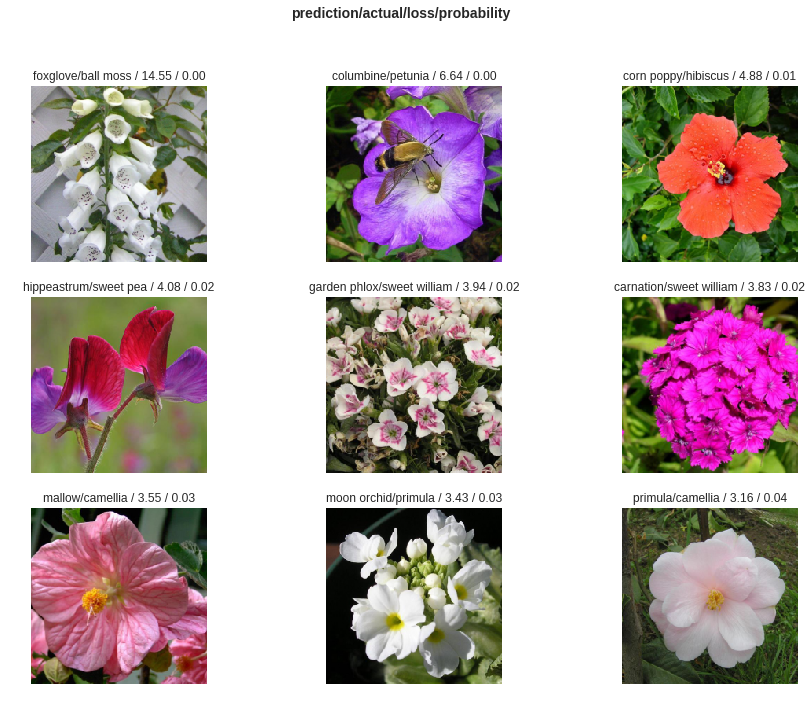

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

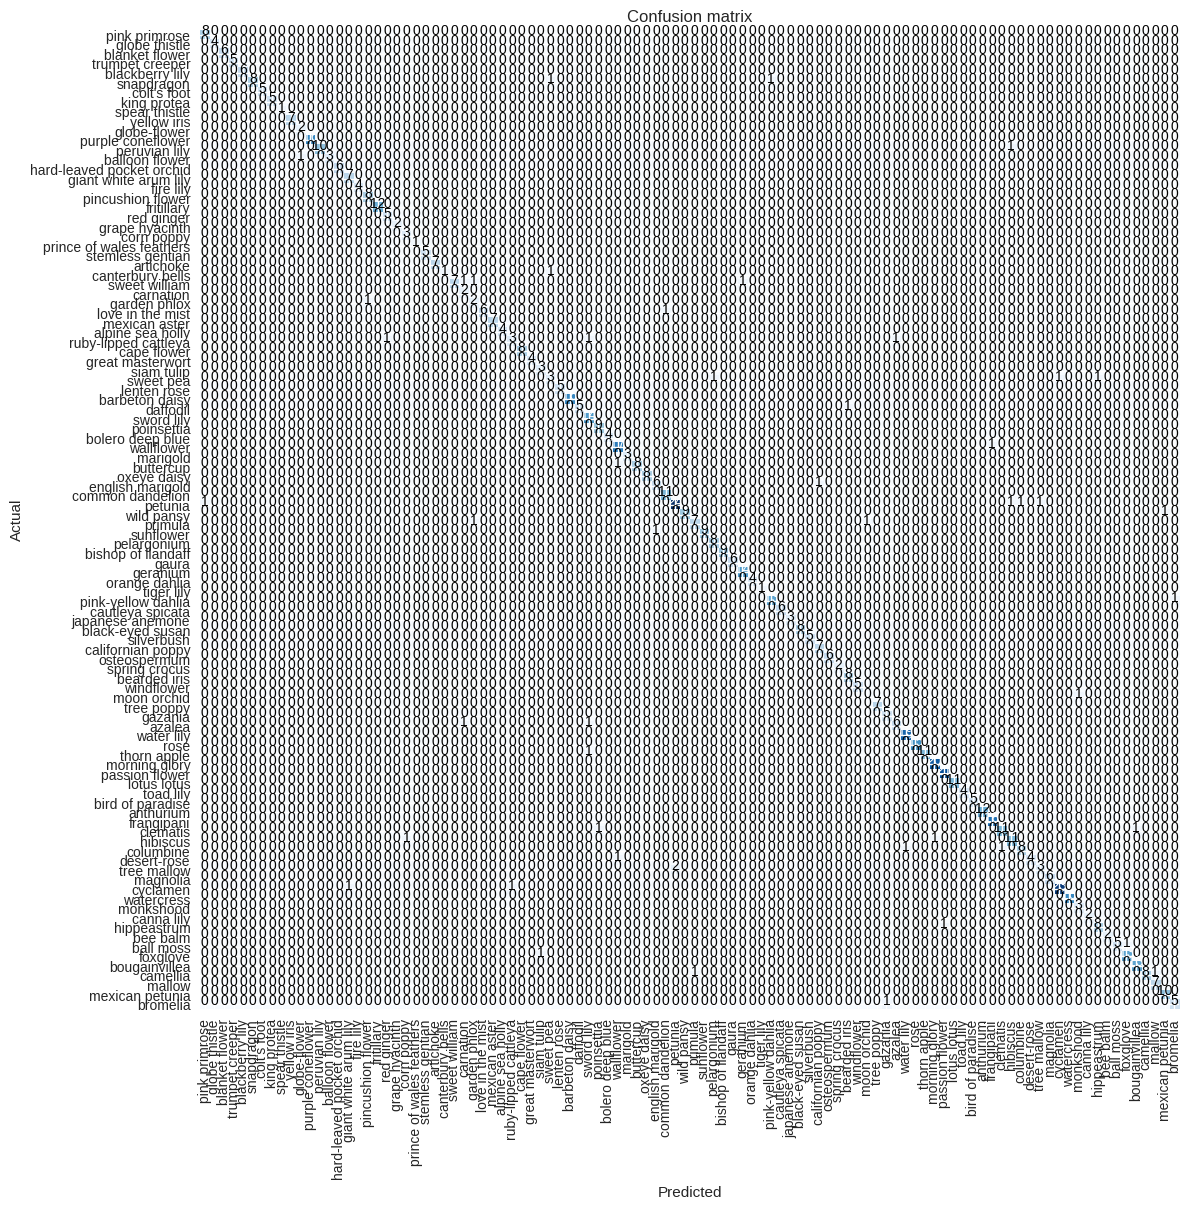

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=100)

## Unfreezing, fine-tuning, and learning rates

Since our model is working as we expect it to, we will *unfreeze* our model and train some more.

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy
1,0.435562,0.213880,0.953545


In [0]:
learn.load('/content/gdrive/My Drive/Colab Notebooks/models/flower_fastai_stage-1');

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


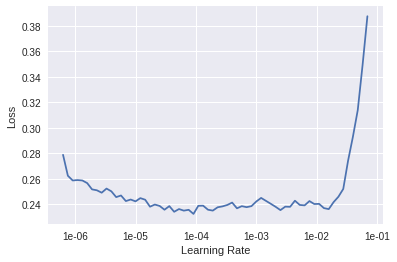

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,accuracy
1,0.229236,0.159020,0.962103
2,0.140941,0.128166,0.971883


That's a pretty accurate model!

In [0]:
learn.save('/content/gdrive/My Drive/Colab Notebooks/models/flower_fastai_stage-2')

## Training: resnet50

Now we will train in the same way as before but with one caveat: instead of using resnet34 as our backbone we will use resnet50 (resnet34 is a 34 layer residual network while resnet50 has 50 layers. It will be explained later in the course and you can learn the details in the [resnet paper](https://arxiv.org/pdf/1512.03385.pdf)).

Basically, resnet50 usually performs better because it is a deeper network with more parameters. Let's see if we can achieve a higher performance here. To help it along, let's us use larger images too, since that way the network can see more detail. We reduce the batch size a bit since otherwise this larger network will require more GPU memory.

In [0]:
data = (ImageItemList.from_folder(data_dir) #Where to find the data? -> in path and its subfolders
        .split_by_folder()              #How to split in train/valid? -> use the folders
        .label_from_folder()            #How to label? -> depending on the folder of the filenames
        .transform(tfms, size=224)       #Data augmentation? -> use tfms with a size of 64
        .databunch())                   #Finally? -> use the defaults for conversion to ImageDataBunch
data.train_ds.y.classes = list(map(lambda idx: cat_to_name[idx], data.train_ds.y.classes))


In [0]:
learn = create_cnn(data, models.resnet50, metrics=accuracy)

epoch,train_loss,valid_loss,accuracy


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


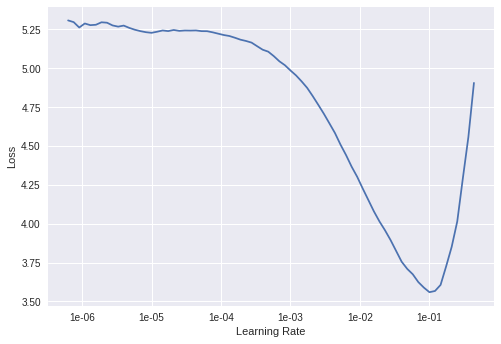

In [19]:
learn.lr_find()
learn.recorder.plot()

In [20]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,accuracy
1,2.454260,0.862644,0.841076
2,0.847243,0.315976,0.926650
3,0.409834,0.189589,0.947433
4,0.222231,0.155360,0.958435
5,0.147807,0.150715,0.955990
6,0.098831,0.115360,0.966993
7,0.063655,0.112422,0.969438
8,0.049329,0.107184,0.971883


In [0]:
learn.save('/content/gdrive/My Drive/Colab Notebooks/models/flower_fastai_stage-1-50')

It's astonishing that it's possible to recognize pet breeds so accurately! Let's see if full fine-tuning helps:

In [22]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,accuracy
1,0.110464,0.216487,0.938875
2,0.099444,0.094331,0.977995
3,0.042786,0.078293,0.981663


If it doesn't, you can always go back to your previous model.

In [0]:
learn.save('/content/gdrive/My Drive/Colab Notebooks/models/flower_fastai_stage-2-50')